In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [150]:
dt1 = 2500
t21 = 39900-dt1

data = np.transpose(np.loadtxt('t1:3000t2:'+str(t21)+'dt:'+str(dt1)+'betaGate:0.txt'))
energies = data[0]
early = 4*data[1]
late = 4*data[2]
earlyDirect = data[3]
earlyBackground = data[4]
lateDirect = data[5]
lateBackground = data[6]

In [151]:
energies[3]

818.0

In [152]:
early818 = earlyDirect[3]-4*earlyBackground[3]
early818

1044.2224

In [153]:
late818 = lateDirect[3]-4*lateBackground[3]
late818

1072.7788

In [154]:
popt = np.array([ 368.4981873 , -321.9749353 ,   99.85602087,  -12.92620028, 0.60700302])
def eff(x,a,b,c,d,e):
    return (a+b*np.log(x)+c*np.log(x)**2+d*np.log(x)**3+e*np.log(x)**4)/x

In [155]:
lambda1 = np.log(2)/(13.04*24*60*60)
lambda1err = lambda1*np.sqrt(0.03/13.04)
lambda2 = np.log(2)/17.5
lambda2err = lambda2*0.001

Ig818 = 0.9970
N0 = 44472.820695352544*2 / eff(518.5,*popt) / lambda2
N0err = N0*np.sqrt(1/(44472.820695352544*2) + (lambda2err/lambda2)**2)
dt = dt1/1000
t1 = 0
t2 = dt
t3 = 39.9-dt-3
t4 = 39.9-3


upper = early818 - late818
upperErr = np.sqrt(early818 + late818)

lower = eff(818.5,*popt) * N0 * ( (np.exp(-lambda2*t4) - (-lambda2*t3)) - (np.exp(-lambda2*t2) - (-lambda2*t1)) )
lowerErr1 = np.sqrt( (np.exp(-lambda2*t4)*(t4*lambda2err))**2 + (np.exp(-lambda2*t3)*(t3*lambda2err))**2 + (np.exp(-lambda2*t2)*(t2*lambda2err))**2 + (np.exp(-lambda2*t1)*(t1*lambda2err))**2)
lowerErr2 = np.sqrt(N0)
lowerErr = lower*np.sqrt(1/N0 + (lowerErr1/((np.exp(-lambda2*t4) - (-lambda2*t3)) - (np.exp(-lambda2*t2) - (-lambda2*t1))))**2)


add = lambda1/lambda2 * Ig818

result = upper/lower + add
err = result*np.sqrt((upperErr/upper)**2 + (lowerErr/lower)**2)
result

-1.1559436181783562e-05

In [171]:
fittedResults = []
fittedErrs = []
directResults = []
directErrs = []
dts = []

for i in range(125):
    if(i == 0): continue
    dt1 = i*100
    t21 = 39500-i*100

    data = np.transpose(np.loadtxt('t1:3000t2:'+str(t21)+'dt:'+str(dt1)+'betaGate:0.txt'))
    energies = data[0]
    early = 4*data[1]
    late = 4*data[2]
    earlyDirect = data[3]
    earlyBackground = data[4]
    lateDirect = data[5]
    lateBackground = data[6]
    dt = dt1/1000
    t1 = 0
    t2 = dt
    t3 = 39.5-dt-3
    t4 = 39.5-3


    upper = early[3] - late[3]
    upperDirect = earlyDirect[3]-4*earlyBackground[3]-(lateDirect[3]-4*lateBackground[3])
    upperErr = np.sqrt(early818 + late818)
    upperDirectError = np.sqrt(abs(earlyDirect[3])+abs(4*earlyBackground[3])+abs(4*lateBackground[3])+abs(lateDirect[3]))

    lower = eff(818.5,*popt) * N0 * ( (np.exp(-lambda2*t4) - (-lambda2*t3)) - (np.exp(-lambda2*t2) - (-lambda2*t1)) )
    lowerErr1 = np.sqrt( (np.exp(-lambda2*t4)*(t4*lambda2err))**2 + (np.exp(-lambda2*t3)*(t3*lambda2err))**2 + (np.exp(-lambda2*t2)*(t2*lambda2err))**2 + (np.exp(-lambda2*t1)*(t1*lambda2err))**2)
    lowerErr2 = np.sqrt(N0)
    lowerErr = lower*np.sqrt(1/N0 + (lowerErr1/((np.exp(-lambda2*t4) - (-lambda2*t3)) - (np.exp(-lambda2*t2) - (-lambda2*t1))))**2)


    add = lambda1/lambda2 * Ig818

    result = upper/lower + add
    err = result*np.sqrt((upperErr/upper)**2 + (lowerErr/lower)**2)
    fittedResults.append(result)
    fittedErrs.append(err)
    
    resultDirect = upperDirect/lower + add
    errDirect = resultDirect*np.sqrt((upperDirectError/upper)**2 + (lowerErr/lower)**2)
    directResults.append(resultDirect)
    directErrs.append(errDirect)
    dts.append(dt)

(-0.0002, 0.0001)

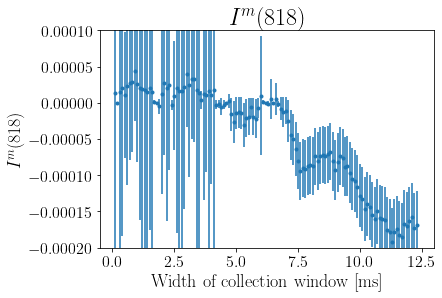

In [173]:
fig, ax = plt.subplots()
ax.errorbar(dts,fittedResults,yerr = fittedErrs,fmt='.')
ax.set_xlabel('Width of collection window [ms]')
ax.set_ylabel(r'$I^m(818)$')
ax.set_title(r'$I^m(818)$')
ax.set_ylim(-0.0002,0.0001)

Text(0.5, 1.0, '$I^m(818)$ with direct counting')

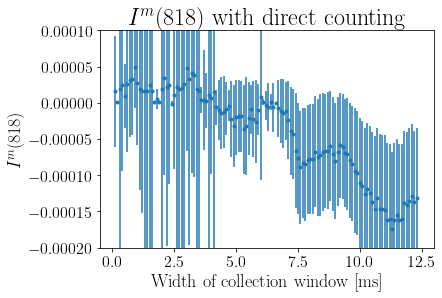

In [174]:
fig, ax = plt.subplots()
ax.errorbar(dts,directResults,yerr = directErrs,fmt='.')
ax.set_xlabel('Width of collection window [ms]')
ax.set_ylabel(r'$I^m(818)$')
ax.set_ylim(-0.0002,0.0001)
ax.set_title(r'$I^m(818)$ with direct counting')

In [56]:
merits = []
errors = []
dts = []
fittedmerits = []
fittedErrors = []

for i in range(125):
    if(i == 0): continue
    data = np.transpose(np.loadtxt('t1:3000t2:'+str(39900-100*i)+'dt:' +str(i*100)+'betaGate:0.txt'))
    early = 4*data[1]
    late = 4*data[2]
    earlyDirect = data[3]
    earlyBackground = data[4]
    lateDirect = data[5]
    lateBackground = data[6]
    merit = earlyDirect[3]-4*earlyBackground[3]-(lateDirect[3]-4*lateBackground[3])#*np.sqrt(early[3] + late[3])
    merits.append(merit)
    dts.append(i*100)
    errors.append(np.sqrt(earlyDirect[3]+4*earlyBackground[3]+4*lateBackground[3]+lateDirect[3]))
    fittedmerits.append(early[3]-late[3])
    fittedErrors.append(np.sqrt(early[3]+late[3]))

In [57]:
lateBackground[3]

229.222

Text(0.5, 1.0, 'Differences')

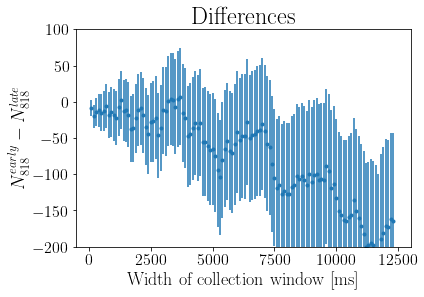

In [59]:
fig, ax = plt.subplots()
ax.errorbar(dts,merits,yerr = errors,fmt='.')
ax.set_ylim(-200,100)
ax.set_xlabel('Width of collection window [ms]')
ax.set_ylabel(r'$N_{818}^{early}-N_{818}^{late}$')
ax.set_title('Differences')

(-200.0, 100.0)

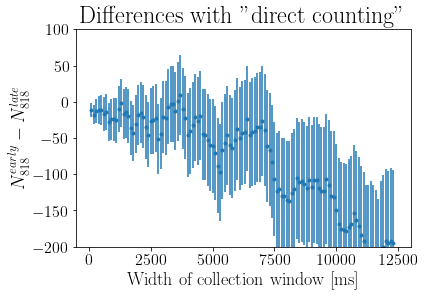

In [60]:
fig, ax = plt.subplots()
ax.errorbar(dts,fittedmerits,yerr = fittedErrors,fmt='.')
ax.set_xlabel('Width of collection window [ms]')
ax.set_ylabel(r'$N_{818}^{early}-N_{818}^{late}$')
ax.set_title('Differences with "direct counting"')
ax.set_ylim(-200,100)

In [ ]:
fittedmerits

In [ ]:
merits

In [202]:
def r818m(t,lambdam,N0m,BR):
    return BR*lambdam*N0m*np.exp(-lambdam*t)

def r818g(t,lambdam,lambdag,N0m,N0g,BR):
    return 0.997*lambdag*(N0g*np.exp(-lambdag*t)+1*N0m*(np.exp(-lambdag*t)-np.exp(-lambdam*t)))

def r818t(t,lambdam,lambdag,N0m,N0g,BR):
    return r818m(t,lambdam,N0m,BR) + r818g(t,lambdam,lambdag,N0m,N0g,BR)

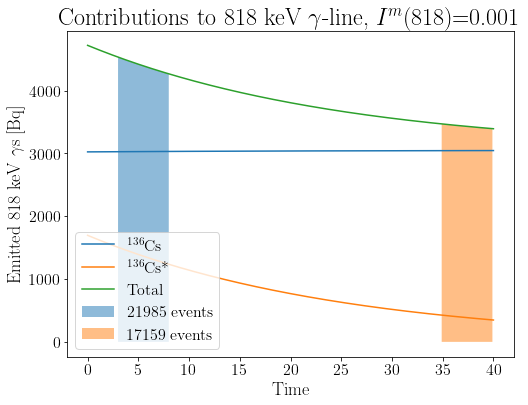

In [231]:
lambdag = np.log(2)/(13.04*24*60*60)
lambdam = np.log(2)/17.5
N0m = 44472.820695352544*2 / eff(518.5,*popt) / lambda2
N0g = N0m/0.008683206456652784

timespace = np.linspace(0,40,1000)

fig, ax = plt.subplots(figsize = [8,6])
br = 0.001

ax.plot(timespace,r818g(timespace,lambdam,lambdag,N0m,N0g,br),label=r'$^{136}$Cs')
ax.plot(timespace,r818m(timespace,lambdam,N0m,br),label=r'$^{136}$Cs*')
ax.plot(timespace,r818t(timespace,lambdam,lambdag,N0m,N0g,br),label=r'Total')
ax.set_title(r'Contributions to 818 keV $\gamma$-line, $I^m$(818)='+str(br))
ax.set_ylabel('Emitted 818 keV $\gamma$s [Bq]')
ax.set_xlabel('Time')

lowerWindow = 3
upperWindow = 39.9
dt = 5

lowerLinspace = np.linspace(lowerWindow,lowerWindow + dt, 1000)
upperLinspace = np.linspace(upperWindow-dt,upperWindow, 1000)

import scipy.integrate as integrate
result = integrate.quad(lambda x: r818t(x,lambdam,lambdag,N0m,N0g,br),lowerWindow,lowerWindow + dt)
result2 = integrate.quad(lambda x: r818t(x,lambdam,lambdag,N0m,N0g,br),upperWindow-dt,upperWindow)

ax.fill_between(lowerLinspace, r818t(lowerLinspace,lambdam,lambdag,N0m,N0g,br),alpha = 0.5,label=str(round(result[0]))+' events')
ax.fill_between(upperLinspace, r818t(upperLinspace,lambdam,lambdag,N0m,N0g,br),alpha = 0.5,label=str(round(result2[0]))+' events')

ax.legend();

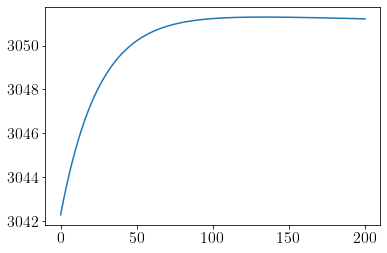

In [204]:
plt.plot(timespace,r818t(timespace,lambdam,lambdag,N0m,N0g,1e-5))

In [192]:
import scipy.integrate as integrate
result = integrate.quad(lambda x: r818t(x,lambdam,lambdag,N0m,N0g,1e-5),t1,t2)
result2 = integrate.quad(lambda x: r818t(x,lambdam,lambdag,N0m,N0g,1e-5),t3,t4)

In [193]:
result

(37748.46190663227, 4.190921155292878e-10)

In [194]:
result2

(37803.978533665315, 4.1970847390510395e-10)

In [195]:
result[0]-result2[0]

-55.51662703304464

In [196]:
part1 = 1e-5*(-N0m*(np.exp(-lambdam*t2) - np.exp(-lambdam*t1)))
part21 = N0g*(np.exp(-lambdag*t2)-np.exp(-lambdag*t1))
part22 = N0m*((np.exp(-lambdag*t2)-np.exp(-lambdag*t1))-lambdag/lambdam*(np.exp(-lambdam*t2)-np.exp(-lambdam*t1)))
result1 = part1 - 0.997*(part21+part22)
result1

37748.461906603734

In [197]:
part1 = 1e-5*(-N0m*(np.exp(-lambdam*t4) - np.exp(-lambdam*t3)))
part21 = N0g*(np.exp(-lambdag*t4)-np.exp(-lambdag*t3))
part22 = N0m*((np.exp(-lambdag*t4)-np.exp(-lambdag*t3))-lambdag/lambdam*(np.exp(-lambdam*t4)-np.exp(-lambdam*t3)))
result2 = part1 - 0.997*(part21+part22)
print(result2)
result1-result2

37803.97853357973


-55.51662697599386

In [198]:
part1 = 1e-5*(-N0m*(np.exp(-lambdam*t2) - np.exp(-lambdam*t1)))
part21 = N0g*(lambdag*t2+lambdag*t1)
part22 = N0m*((lambdag*t2-lambdag*t1)+lambdag/lambdam*(np.exp(-lambdam*t2)-np.exp(-lambdam*t1)))
result1 = part1 + 0.997*(part21+part22)
result1

37748.60624220843

In [199]:
part1 = 1e-5*(-N0m*(np.exp(-lambdam*t4) - np.exp(-lambdam*t3)))
part21 = N0g*(lambdag*t4-lambdag*t3)
part22 = N0m*((lambdag*t4-lambdag*t3)+lambdag/lambdam*(np.exp(-lambdam*t4)-np.exp(-lambdam*t3)))
result2 = part1 + 0.997*(part21+part22)
result1-result2

-56.07766851292399

In [200]:
dresult = N0m*( (np.exp(-lambdam*t4)-np.exp(-lambdam*t3)) - (np.exp(-lambdam*t2)-np.exp(-lambdam*t1)))*(1e-5 - lambdag/lambdam * 0.997)
dresult

-56.07766851292337

In [201]:
-56.62402908706474/(N0m*( (np.exp(-lambdam*t4)-np.exp(-lambdam*t3)) - (np.exp(-lambdam*t2)-np.exp(-lambdam*t1))))+lambdag/lambdam * 0.997

9.946549398411973e-06

In [ ]:
eff(818.5,*popt)